## Reading the Yahoo stocks and necessary stuff

### Stock data is imported from yfinance

In [1]:
#importing stuff
!pip3 install yfinance
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
%matplotlib inline

You should consider upgrading via the '/home/omar/anaconda3/bin/python -m pip install --upgrade pip' command.


In [8]:
#getting data
data = yf.download('AAPL', start="2020-01-31", end="2021-02-27")
data.tail()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-02-22,128.009995,129.720001,125.599998,126.000000,126.000000,103607600
2021-02-23,123.760002,126.709999,118.389999,125.860001,125.860001,157859100
2021-02-24,124.940002,125.559998,122.230003,125.349998,125.349998,110691500
2021-02-25,124.680000,126.459999,120.540001,120.989998,120.989998,147306500
2021-02-26,122.589996,124.849998,121.199997,121.260002,121.260002,164320000


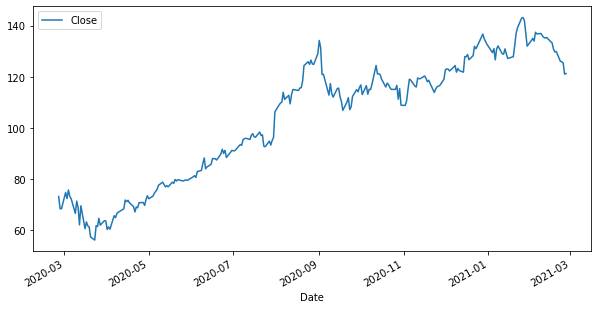

In [4]:
fig = plt.figure(figsize = (10,5))
data['Close'].plot(figsize=(10,5))
plt.legend()

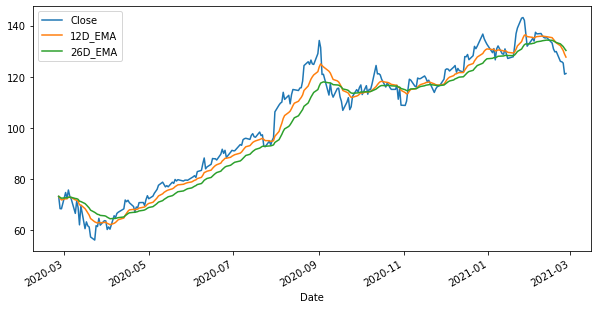

In [6]:
data['12D_EMA'] = data.Close.ewm(span = 12, adjust = False).mean()
data['26D_EMA'] = data.Close.ewm(span= 26, adjust = False).mean()
data['MACD'] = data['12D_EMA'] - data['26D_EMA']

data[['Close','12D_EMA','26D_EMA']].plot(figsize=(10,5))
plt.show()

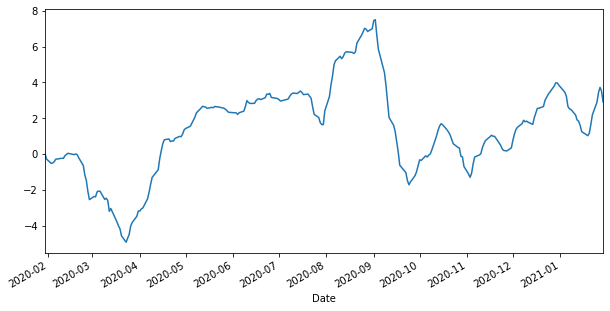

In [21]:
data['MACD'].plot(figsize=(10,5))
plt.show()

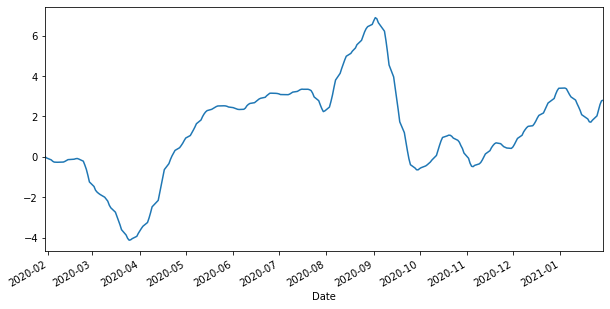

In [25]:
data['MacdSignal'] = data.MACD.ewm(span=9,adjust = False).mean()
data['MacdSignal'].plot(figsize=(10,5))
plt.show()

### When the value of MACD series is greater than signal series then buy, else sell.

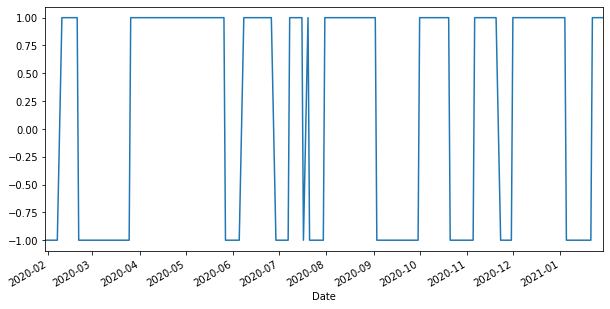

In [26]:
data['TradingSignal'] = np.where(data['MACD'] > data['MacdSignal'], 1, -1)
data['TradingSignal'].plot(figsize=(10,5))
plt.show()

### As we can see today is at 1. ie we sell today :)